In [56]:
import pandas as pd
import numpy as np
import os

basedir = "/cbscratch/franco/datasets/geuvadis/expression"

rpkm_df = pd.read_csv(os.path.join(basedir, "RPKMs.reproc.462.allgenes.txt"), sep="\t", header=0, index_col=0)
orig_df = pd.read_csv(os.path.join(basedir, "GD462.GeneQuantRPKM.50FN.samplename.resk10.txt.gz"), sep="\t", header=0, index_col=0) 

In [40]:
orig_df_crop = orig_df.drop(["Gene_Symbol", "Chr", "Coord"], axis=1)

In [96]:
print(orig_df_crop.shape)
print(rpkm_df.shape)


(23722, 462)
(52786, 462)


In [42]:
orig_genes = set(list(orig_df_crop.index))
rpkm_genes   = set(list(rpkm_df.index))

common_genes = set.intersection(orig_genes, rpkm_genes)
print(len(common_genes))

23316


HG00097


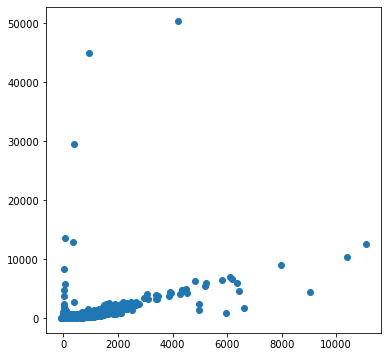

HG00099


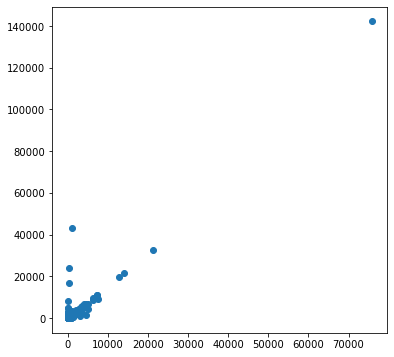

HG00100


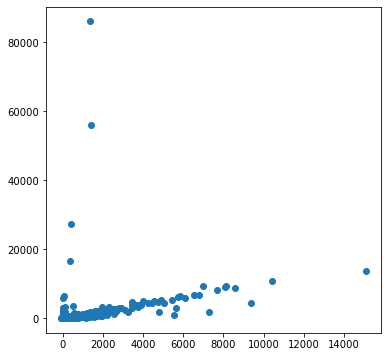

HG00101


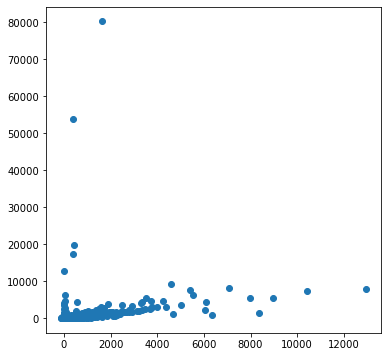

HG00102


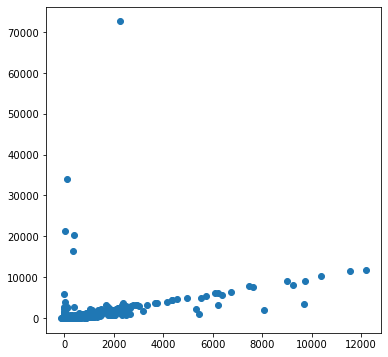

HG00103


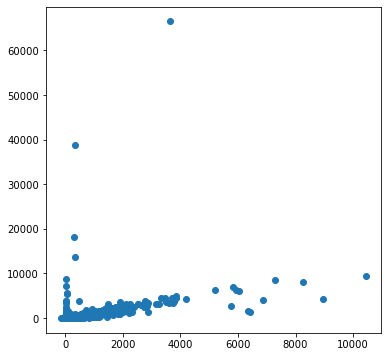

HG00104


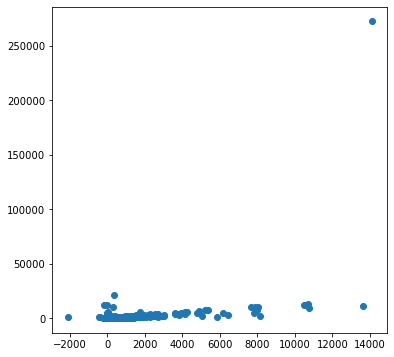

RuntimeError: No active exception to reraise

In [98]:
import matplotlib.pyplot as plt

samplenames = rpkm_df.columns[1:]

for i,s in enumerate(samplenames):
    print(s)
    s_orig = orig_df_crop[s][common_genes]
    s_rpkm = rpkm_df[s][common_genes]
    
    fig = plt.figure(figsize=(6,6))
    ax1 = fig.add_subplot(111)
    ax1.scatter(s_orig, s_rpkm)
    plt.show()
    
    if i> 5:
        raise

In [101]:
# iterate over all samples, and find genes over 20000rpkms, collect them and find all in common
# maybe count in how many samples it's like that
import collections

weird_genes = collections.defaultdict(int)
weird_genes_orig = collections.defaultdict(int)
for i,s in enumerate(samplenames):
    this_genes = list(rpkm_df[rpkm_df[s] > 20000].index)
    this_genes_orig = list(orig_df_crop[orig_df_crop[s] > 20000].index)
    for g in this_genes:
        weird_genes[g] += 1
    for g in this_genes_orig:
        weird_genes_orig[g] += 1
    
for k in weird_genes:
    print(k, weird_genes[k])
    
print("#######")
for k in weird_genes_orig:
    print(k, weird_genes_orig[k])

ENSG00000254772.4 421
ENSG00000211592.2 349
ENSG00000211675.2 190
ENSG00000226958.1 13
ENSG00000243013.1 2
ENSG00000240831.1 2
ENSG00000262526.1 65
ENSG00000258232.1 117
ENSG00000260272.1 4
ENSG00000243172.1 1
ENSG00000255242.1 7
ENSG00000211677.2 1
ENSG00000211679.2 1
ENSG00000233476.2 1
#######
ENSG00000240831.1 1
ENSG00000226958.1 9
ENSG00000211679.2 1
ENSG00000211677.2 1


In [102]:
delete_genes = ["ENSG00000254772.4", "ENSG00000211592.2", "ENSG00000211675.2", "ENSG00000262526.1", "ENSG00000258232.1", "ENSG00000255242.1"]

rpkm_df_fix = rpkm_df.drop(delete_genes)
rpkm_genes_fix = set(list(rpkm_df_fix.index))

common_genes_fix = set.intersection(orig_genes, rpkm_genes_fix)
print(len(common_genes_fix))

23310


HG00097


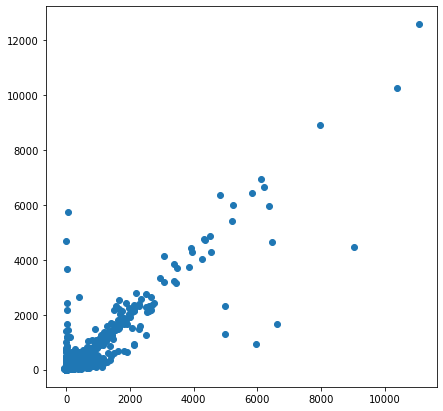

HG00099


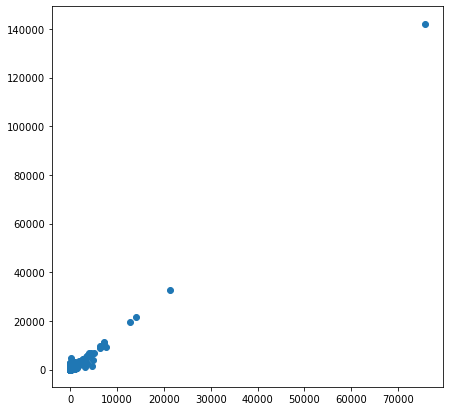

HG00100


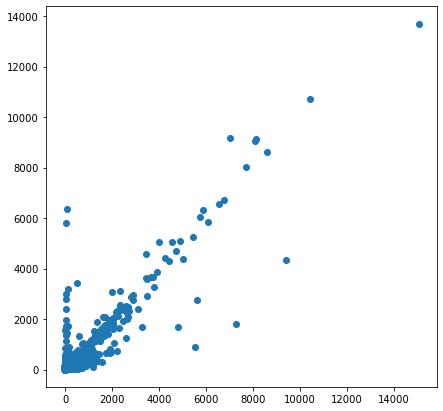

HG00101


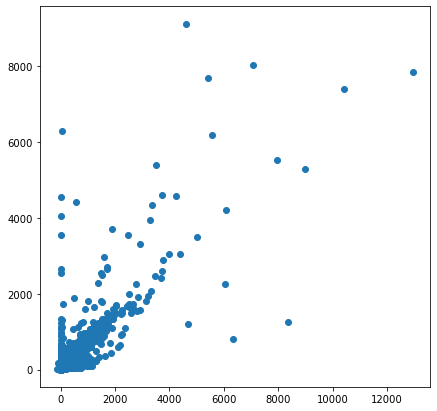

HG00102


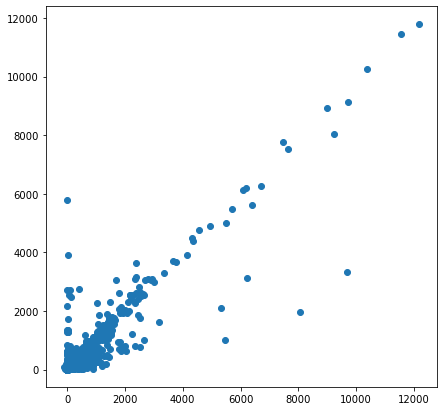

HG00103


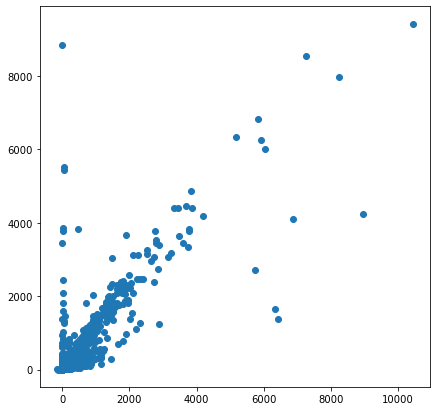

HG00104


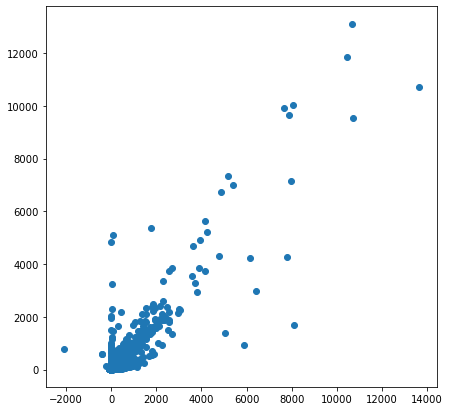

RuntimeError: No active exception to reraise

In [103]:
# All kind of good here, looks good without those weird genes

samplenames = rpkm_df.columns[1:]

for i,s in enumerate(samplenames):
    print(s)
    s_orig = orig_df_crop[s][common_genes_fix]
    s_rpkm = rpkm_df_fix[s][common_genes_fix]
    
    fig = plt.figure(figsize=(7,7))
    ax1 = fig.add_subplot(111)
    ax1.scatter(s_orig, s_rpkm)
    plt.show()
    
    if i> 5:
        raise

In [105]:
rpkm_df_fix.shape

(52780, 462)

In [106]:
# Export this rpkm file

outfile="/cbscratch/franco/datasets/geuvadis/expression/RPKMs.reproc.462.allgenes.fix.txt"
rpkm_df_fix.to_csv(outfile, sep="\t", index=True, header=True)

In [108]:
# Do the same for TPMs, import and re-export TPMs

infile = "/cbscratch/franco/datasets/geuvadis/expression/TPMS.reproc.462.allgenes.txt"
tpms_df = pd.read_csv(infile, sep="\t", header=0, index_col=0)
tpms_df_fix = tpms_df.drop(delete_genes)
outfile = "/cbscratch/franco/datasets/geuvadis/expression/TPMS.reproc.462.allgenes.fix.txt"
tpms_df_fix.to_csv(outfile, sep="\t", index=True, header=True)

In [ ]:
# ATENTION!: this fix 'probably' does not provide ANY advantage for calculating RR.
# The difference seems to be between RPKMs and TPMs instead of these weird genes.

## Other gene outliers

In [94]:
import scipy.stats as ss

1-ss.norm.cdf(4, 0, 1)

3.167124183311998e-05

In [86]:
# Now let's check if there are other genes with many outlier samples. Z > 4 for a gene implies 1 in 100000
# Mmmmm it's actually possible because it's N x G ??

# iterate over all genes and find which genes have at least 10 samples with Z > 4

gene_outliers = dict()
for i,g in enumerate(common_genes):
    Z = (rpkm_df.loc[g] - np.mean(rpkm_df.loc[g])) / np.std(rpkm_df.loc[g])
    outliers = np.sum(Z > 4)
    gene_outliers[g] = outliers
        


In [87]:
for g in gene_outliers:
    if gene_outliers[g] > 10:
        print(g, gene_outliers[g])

ENSG00000102362.11 11
ENSG00000140488.9 11
ENSG00000239732.1 12
ENSG00000261126.1 11
ENSG00000258768.1 11
ENSG00000249281.1 12
ENSG00000257613.1 11
ENSG00000248746.1 11
ENSG00000176894.5 12
ENSG00000244617.1 13
ENSG00000231177.4 11
ENSG00000124602.5 11
ENSG00000107338.8 13
ENSG00000262086.1 13
ENSG00000232729.1 11
ENSG00000164535.8 11
ENSG00000214279.6 11
